**Configuration**

In [1]:
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow import keras
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'
seed(0)
set_seed(0)

Retrieve and present data sets

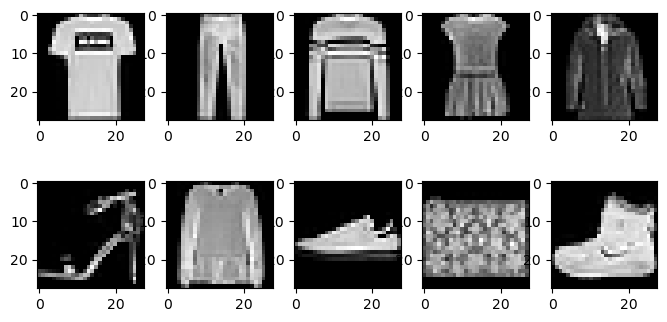

In [3]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = len(np.unique(y_train))

fig = plt.figure(figsize=(8,4))
for i in range(num_classes):
    fig.add_subplot(2, 5, i+1)
    
    idx = np.where(y_train==i)[0]
    im = x_train[idx][0]

    plt.imshow(im, plt.get_cmap('gray'))

Setting up plotting

In [56]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

def add_history_traces(fig, history, desc):
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Scatter(y=history.history['loss'],
                        mode='lines',
                        name=desc),
                 row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['accuracy'],
                        mode='lines',
                        name=desc),
                     row=1, col=2)
    
    fig.update_xaxes(title_text="Epochs", row=1, col=1)
    fig.update_yaxes(title_text="loss", row=1, col=1)
    
    fig.update_xaxes(title_text="Epochs", row=1, col=2)    
    fig.update_yaxes(title_text="loss", row=1, col=2)
    return fig

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Implementing standard Deep Neural Networks (DNN)

In [58]:
# Reshape X data
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

num_features = x_train_flat.shape[1]

# One-hot encode y data
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Model configuration
model = Sequential()
model.add(Dense(128, input_dim=num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.0001),
              metrics=['accuracy'])

# Apply training data to model and add traces to graph
history = model.fit(x_train_flat, y_train_categorical, epochs=10)
fig = add_history_traces(fig, history, 'Deep Neural Network')

# Apply test data to model
loss, accuracy = model.evaluate(x_test_flat, y_test_categorical)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2720 - accuracy: 0.3956
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5356 - accuracy: 0.5268
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4009 - accuracy: 0.5698
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3240 - accuracy: 0.5874
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2760 - accuracy: 0.5980
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2414 - accuracy: 0.6049
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2143 - accuracy: 0.6090
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1913 - accuracy: 0.6141
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1677 - accuracy: 0.6179
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 1.1351 

In [61]:
fig = add_history_traces(fig, history, 'Deep Neural Network')
fig = add_history_traces(fig, historyC, 'Conv Neural Network')
fig.show()

Implementing Convulutional Neural Networks (CNN)

In [59]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD

In [51]:
# Reshape x data and determine first layer inputs
height = x_train.shape[1]
width = x_train.shape[2]
channels = 1

x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)

# One-hot encode y data
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Initialise model
model = Sequential()

# Build model - convulutional layers
model.add(Conv2D(filters=32, 
                kernel_size=(5,5), 
                padding='same', 
                activation='relu',
                input_shape=(height, width, channels)))
model.add(MaxPooling2D(pool_size=(2,2),
                      strides=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(5,5), 
                 padding='same', 
                 activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2),
                      strides=(2,2)))
model.add(Flatten())

# Build model - standard layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.0001),
              metrics=['accuracy'])

# Apply training data to model and add traces to graph
history = model.fit(x_train_cnn, y_train_categorical, epochs=10)
fig = add_history_traces(fig, history, 'Convulutional Neural Network')

# Apply test data to model
loss, accuracy = model.evaluate(x_test_cnn, y_test_categorical)


Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.7780 - accuracy: 0.7570
Epoch 2/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.5030 - accuracy: 0.8252
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.4445 - accuracy: 0.8437
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4109 - accuracy: 0.8549
Epoch 5/10
1875/1875 [==============================] - 378s 202ms/step - loss: 0.3884 - accuracy: 0.8621
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3699 - accuracy: 0.8689
Epoch 7/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3554 - accuracy: 0.8748
Epoch 8/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3431 - accuracy: 0.8794
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3320 - accuracy: 0.8833
Epoch 10/10
313/313 [==============================] - 4s 11ms

In [57]:
historyC = history
fig = add_history_traces(fig, historyC, 'Convulutional Neural Network')
fig.show()

# STEP FIVE
Now the data is loaded and prepared, the next task is to design a CNN with a single convolutional layer, a single max pooling layer, and two dense layers. 

* The convolutional layer should have 32 filters, padding should be the 'same' and the kernel size should be 5x5. 
* The max pooling layer should have a pool size of 2x2 and stride size of 2x2. 
The dense layers should have 32 and num_classes neurons (units), respectively. 
 * All activation functions should be relu, except for the final layer which should be softmax. 
* The optimizer should be SGD with a learning rate of 0.001.
* Train the network for 10 epochs.


Train this network (model.fit()) and evaluate it on the test set (model.evaluate()).

Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset?
